In [5]:
%load_ext autoreload
%autoreload 2

from market_cluster import *

symbol='DUST'
start_date='2020-06-01'
end_date='2020-07-04'
result_path="/Users/bobcolner/QuantClarity/data"
date_partition='hive'
tick_type='trades'
formats=['feather', 'parquet']
skip=True
# backfill_data(symbol, start_date, end_date, result_path, date_partition, tick_type, formats, skip)

# .plot_bokeh(kind='hist', bins=50, sizing_mode="scale_height", disable_scientific_axes=True)
# df.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)  # 'Blues', 'coolwarm', 'RdBu_r' & 'BrBG' are other good diverging colormaps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [249]:
import itertools

In [299]:
out = list(itertools.product(
    ['SPY', 'GLUU', 'IHI', 'NVDA'], 
    ['2020-07-01', '2020-07-02']
  )
)
out

[('SPY', '2020-07-01'),
 ('SPY', '2020-07-02'),
 ('GLUU', '2020-07-01'),
 ('GLUU', '2020-07-02'),
 ('IHI', '2020-07-01'),
 ('IHI', '2020-07-02'),
 ('NVDA', '2020-07-01'),
 ('NVDA', '2020-07-02')]

In [303]:
def this_cat(a, b):
    return a + b


In [304]:
list(map(this_cat, out))

TypeError: this_cat() missing 1 required keyword-only argument: 'b'

In [276]:
def product(x, y) -> list:
    return list(itertools.product(x, y))


In [297]:
this_sum(1, 4)

TypeError: sum() takes 1 positional argument but 2 were given

In [279]:
list(map(sum, out))

TypeError: sum() takes 1 positional argument but 2 were given

In [4]:
# %time df = read_market_daily(result_path)
%time mdf = pd.read_parquet('mdf.parquet')

%time npdf, sharpe_ratios = normalize_market_df(mdf)

# %time npdf_resid = colwise_linreg(npdf)
%time npdf_resid = pd.read_parquet('npdf_resid.parquet')

# %time par_cor_mat = npdf_resid.corr()
%time resid_par_cor_mat = pd.read_parquet('partial_cor_mat.parquet')

%time details_df = pd.read_parquet('details_df.parquet')

# cluster_lables = cluster_sim_matrix(similarity=resid_par_cor_mat.abs())
%time cluster_lables = pd.read_parquet('cluster_lables.parquet')

# symbol_meta = join_symbol_data(details_df, cluster_lables, sharpe_ratios, mdf)
%time symbol_meta = pd.read_parquet('symbol_meta.parquet')

cluster_coheasion = get_cluster_coheasion(sim_df=resid_par_cor_mat.abs(), symbol_meta=symbol_meta, cluster_col='cluster_n200')

In [57]:
n += 1
print(n)
symbol_meta[symbol_meta.cluster_n200==n].sector.value_counts()

5


Technology                7
Healthcare                7
                          5
Consumer Defensive        2
Financial Services        1
Communication Services    1
Name: sector, dtype: int64

In [58]:
symbol_meta[meta_df.cluster_n200==n].industry.value_counts()

                                   5
Application Software               4
Biotechnology                      4
Semiconductors                     2
Medical Instruments & Equipment    2
Beverages - Alcoholic              1
Consumer Packaged Goods            1
Asset Management                   1
Online Media                       1
Medical Diagnostics & Research     1
Communication Services             1
Name: industry, dtype: int64

In [82]:
sym_clust = symbol_meta[meta_df.cluster_n200==n]
sym_clust

,symbol,cluster_n10,cluster_n50,cluster_n100,cluster_n200,name,sector,industry,tags,similar,type,sharpe_ratio,daily_avg_dollar_volume
56,ADM,0,41,9,5,Archer-Daniels-Midland Company,Consumer Defensive,Consumer Packaged Goods,"[Consumer Defensive, Farm Products, Consumer P...","[TSN, BG, THS, CZZ, SEB, MGPI, INGR]",CS,-0.010496,1.452647e+08
161,AMD,0,41,9,5,Advanced Micro Devices Inc.,Technology,Semiconductors,"[Technology, Semiconductors]","[INTC, MCHP, NVDA, TXN, HPQ, XLK]",CS,0.047679,1.744350e+09
519,BST,0,41,9,5,BlackRock Science and Technology Trust of Bene...,Financial Services,Asset Management,"[Financial Services, Asset Management]",[],CS,0.041043,3.347662e+06
990,DIA,0,41,9,5,SPDR Dow Jones Industrial Average,,,[],[],ET,0.020979,1.006844e+09
1088,EA,0,41,9,5,Electronic Arts Inc.,Technology,Application Software,"[Technology, Electronic Gaming & Multimedia, A...","[MSFT, TTWO, GLUU, ATVI, SNE, DIS, ZNGA, PTE, ...",CS,0.026779,3.924390e+08
1340,FB,0,41,9,5,Facebook Inc.,Technology,Online Media,"[Technology, Internet Content & Information, O...","[MSFT, IAC, TWTR, WB, GOOGL, RENN, MEET, XLK]",CS,0.038102,3.536573e+09
1651,GLUU,0,41,9,5,Glu Mobile Inc.,Technology,Application Software,"[Technology, Electronic Gaming & Multimedia, A...","[MSFT, TTWO, AMZN, AAPL, EA, ATVI, ZNGA, FB, G...",CS,0.034099,1.792674e+07
1991,IHI,0,41,9,5,iShares U.S. Medical Devices,,,[],[],ET,0.049440,4.165448e+07
2410,MASI,0,41,9,5,Masimo Corporation,Healthcare,Medical Instruments & Equipment,"[Healthcare, Medical Instruments & Supplies, M...","[UFPI, CASM, CNMD, BABY, CAH, OMI, RMD, GE, TM...",CS,0.070243,6.098972e+07
2794,NVDA,0,41,9,5,NVIDIA Corporation,Technology,Semiconductors,"[Technology, Semiconductors]","[INTC, MSFT, QCOM, STM, TXN, AMBA, AMD, XLK]",CS,0.048890,2.705407e+09


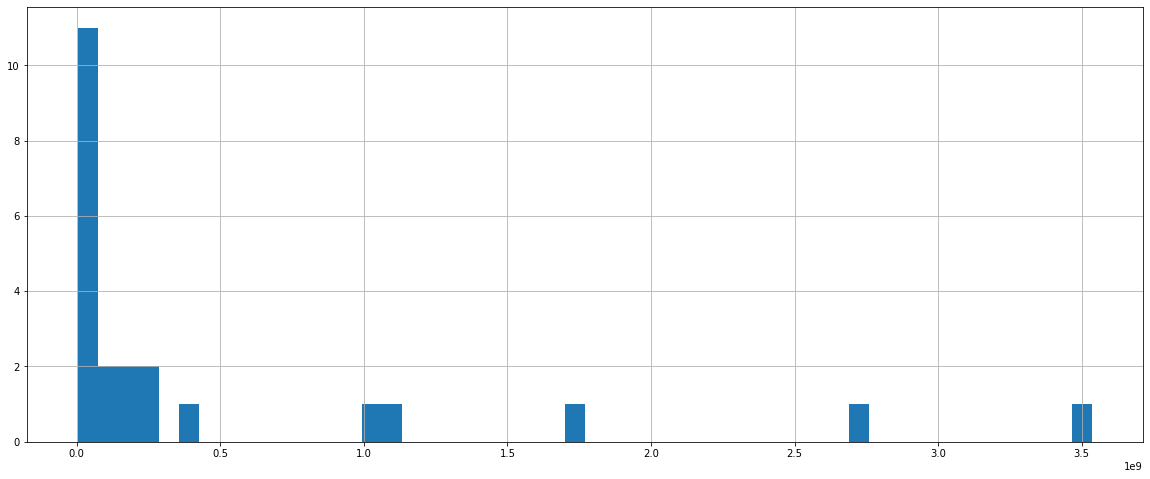

In [110]:
sym_clust.daily_avg_dollar_volume.hist(bins=50, figsize=(20,8))

In [95]:
sym_clust.daily_avg_dollar_volume.quantile(q=[0.01,0.1,0.2,0.5,0.8,0.9,0.99])/10**6

0.01       3.638862
0.10       9.295027
0.20      26.821940
0.50      78.857112
0.80     761.081715
0.90    1617.588147
0.99    3353.716275
Name: daily_avg_dollar_volume, dtype: float64

In [ ]:
sym_clust['liquidy_rank'] = sym_clust.daily_avg_dollar_volume.rank(method='first')

sym_clust = sym_clust.sort_values('liquidy_rank', ascending=False)

import random

random.choices(population=list(sym_clust.symbol), weights=list(sym_clust.liquidy_rank), k=len(sym_clust.symbol))

In [ ]:
from scipy.cluster.hierarchy import linkage, is_valid_linkage, fcluster
from scipy.spatial.distance import pdist

## Load dataset
X = np.load("dataset.npy")

## Hierarchical clustering
dists = pdist(X)
Z = linkage(dists, method='centroid', metric='euclidean')

print(is_valid_linkage(Z))

## Now let's say we want the flat cluster assignement with 10 clusters.
#  If cut_tree() was working we would do
from scipy.cluster.hierarchy import cut_tree
cut = cut_tree(Z, 10)

clust = fcluster(Z, k, criterion='maxclust')

In [ ]:
# from scipy.cluster.hierarchy import cut_tree
from scipy import cluster
np.random.seed(23)
X = np.random.randn(50, 4)
Z = cluster.hierarchy.ward(X, )
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=[5, 10])
cutree[:10]


In [ ]:
import dcor

# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
pardistcorr = lambda column1, column2, colpartial: dcor.partial_distance_correlation(column1, column2, colpartial)

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))
rslt

In [ ]:
# https://arrow.apache.org/docs/python/dataset.html
import pyarrow.dataset as ds

dataset = ds.dataset(
    source=result_path+'/ticks/trades/feather', 
    format="feather", 
    partitioning="hive"
)

df = dataset.to_table(columns=['tick_epoch', 'price', 'size'], filter=ds.field("size") > 999).to_pandas()

sdf = dataset.to_batches()
f = next(sdf)
f.to_pandas()

In [ ]:
def compound_interest(principle:float, rate:float, peroids:int): 
    # Calculates compound interest  
    total_return = principle * (pow((1 + rate / 100), peroids)) 
    print("Total Interest $:", round(total_return, 2))
    print("Anualized Peroid %", round(total_return / principle, 1) * 100)

# compount daily for 1 year (market days)
compound_interest(principle=100000, rate=.5, peroids=250)


In [ ]:
import gcsfs

fs = gcsfs.GCSFileSystem()

path = 'gcs://emerald-skill-datascience/imported/automl_predictions/prediction-premium_d30_train_sample-2020-03-16T22:15:53.212Z'
fs.ls(path)
fo = fs.open(path)

{'cache_storage': '/User/bobcolner/QuantClarity/data/tmp'}

fo = fs.open(
    path='filecache::'+path+'/tables_1.csv',
    mode='r',
    cache_options={'cache_storage':'/User/bobcolner/QuantClarity/data/tmp'}
)

fo.readline()    

import gcsfs
fs = gcsfs.GCSFileSystem(project='<project-name>', token=None)
gcsmap = gcsfs.mapping.GCSMap('<bucket-name>', gcs=fs, check=True, create=False)
# write to the bucket
ds.to_zarr(store=gcsmap)
# read it back
ds_gcs = xr.open_zarr(gcsmap)
